<div align='center'> <h1 style="color: blue">Iris Flower Classification</h1>

<div class='alert alert-info'>
<b><i><h3>This Jupyter Notebook explores machine learning classification with the Iris flower dataset. It aims to build a model that can predict the species (Iris versicolor, Iris setosa, or Iris virginica) of an Iris flower based on its sepal and petal measurements. The notebook will guide you through data loading, exploration, model training, and evaluation using the Iris dataset.

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2021/10/iris-flower.webp)

## For Kaggle Dataset : [Click here](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

## Importing Libraries
We will import the essential libraries for this task here. Additional libraries may be imported as needed throughout the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset into a DataFrame

In [2]:
df=pd.read_csv('IRIS dataset cognorise infotech.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

### Performing Exploratory Data Analysis

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
#species would be our target variable
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Converting categorical variables of species column to numerical variables

In [10]:
final_df=df.replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
final_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
final_df['species'].unique()

array([1, 2, 3], dtype=int64)

### Performing Data Visualization

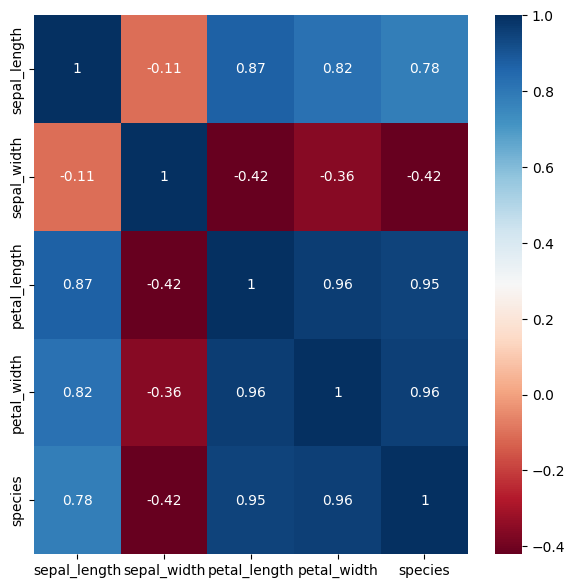

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(final_df.corr(),annot=True,cmap='RdBu')
plt.show()

> #### The Correlation heatmap shows that Sepal_width has negative correlation with species

> #### The Correlation heatmap shows that Sepal_length, petal_width and petal_length have positive correlation with species 

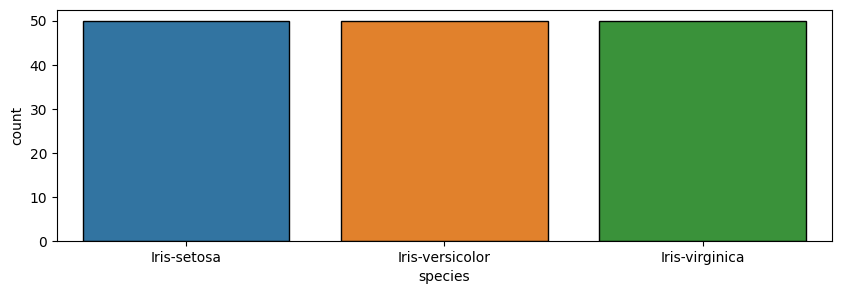

In [13]:
plt.figure(figsize=(10,3))
sns.countplot(x='species',hue='species',data=df,edgecolor='black')
plt.show()

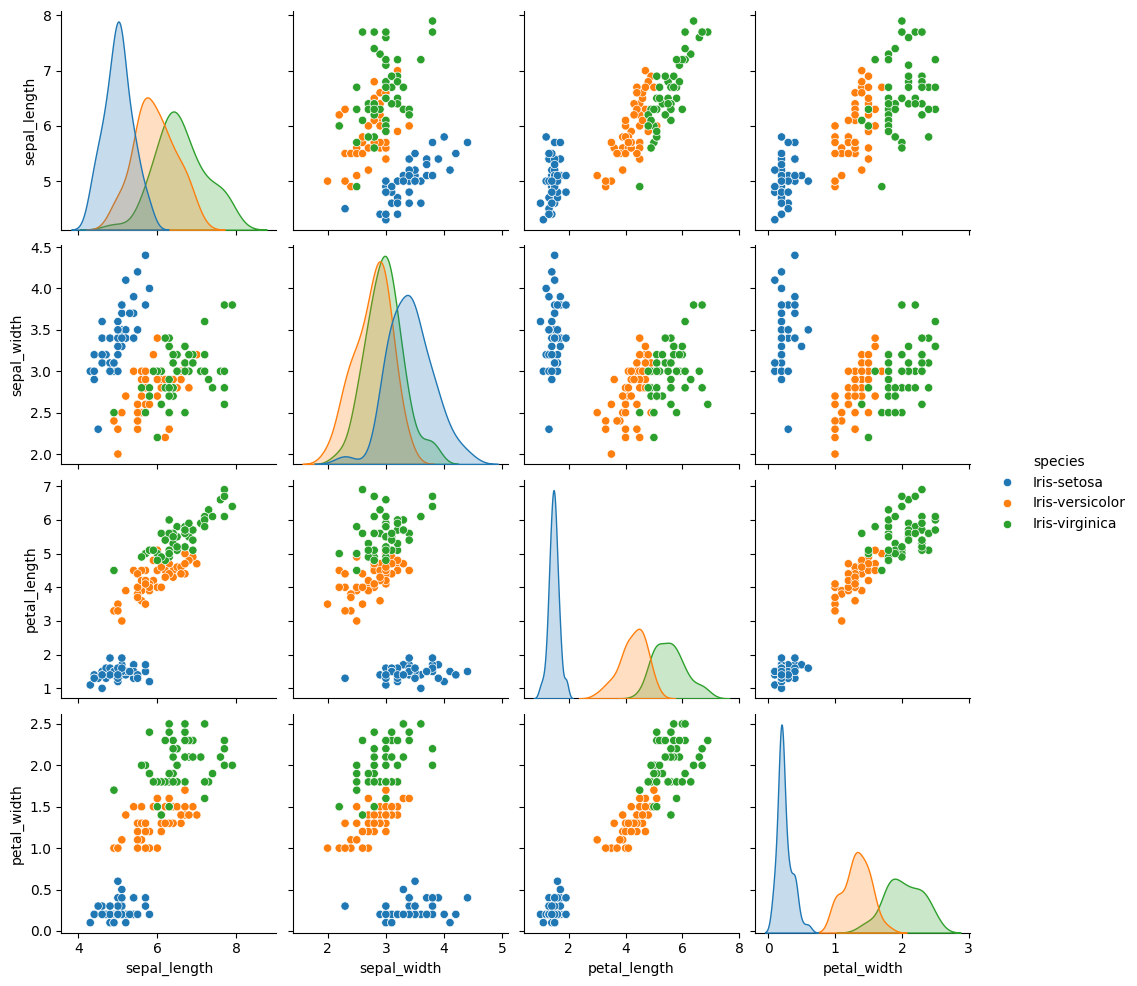

In [14]:
sns.pairplot(df,hue='species')
plt.show()

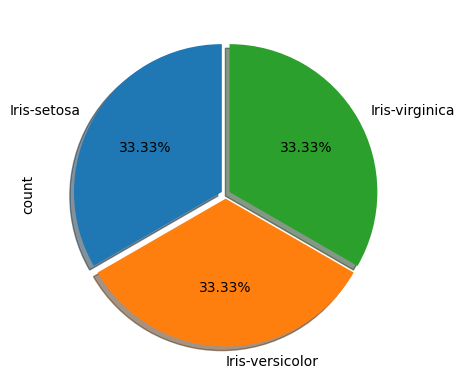

In [15]:
df['species'].value_counts().plot(kind="pie",autopct='%1.2f%%',startangle=90,explode=[0.03,0.03,0.03],shadow=True)
plt.show()

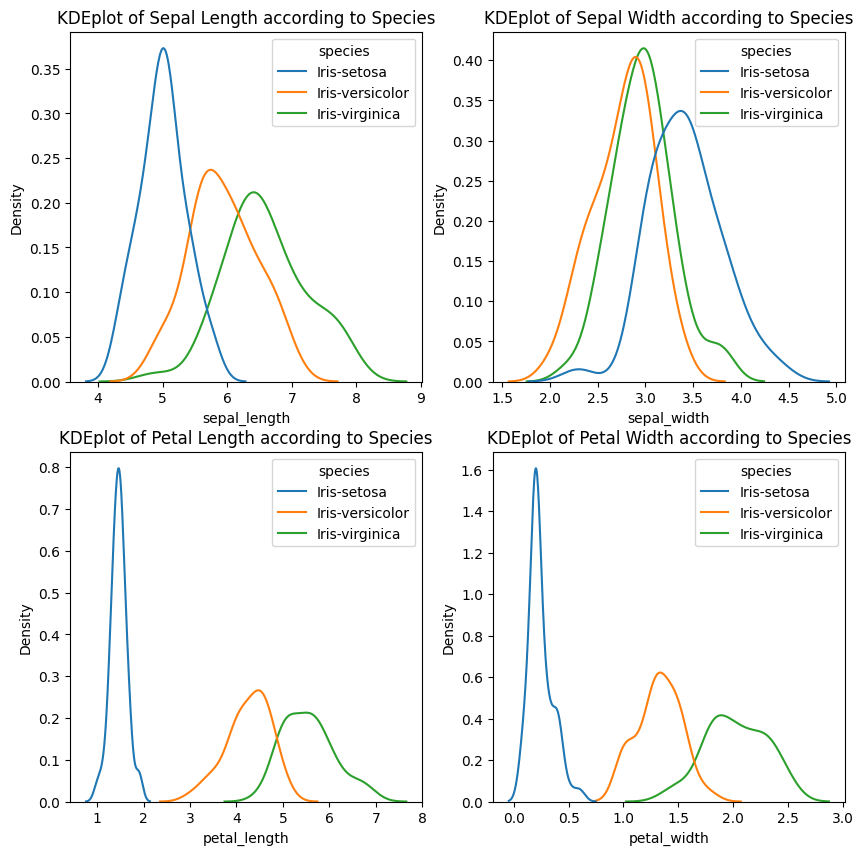

In [16]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
sns.kdeplot(x='sepal_length',hue='species',data=df,ax=ax1)
ax1.set_title('KDEplot of Sepal Length according to Species')
sns.kdeplot(x='sepal_width',hue='species',data=df,ax=ax2)
ax2.set_title('KDEplot of Sepal Width according to Species')
sns.kdeplot(x='petal_length',hue='species',data=df,ax=ax3)
ax3.set_title('KDEplot of Petal Length according to Species')
sns.kdeplot(x='petal_width',hue='species',data=df,ax=ax4)
ax4.set_title('KDEplot of Petal Width according to Species')
plt.show()

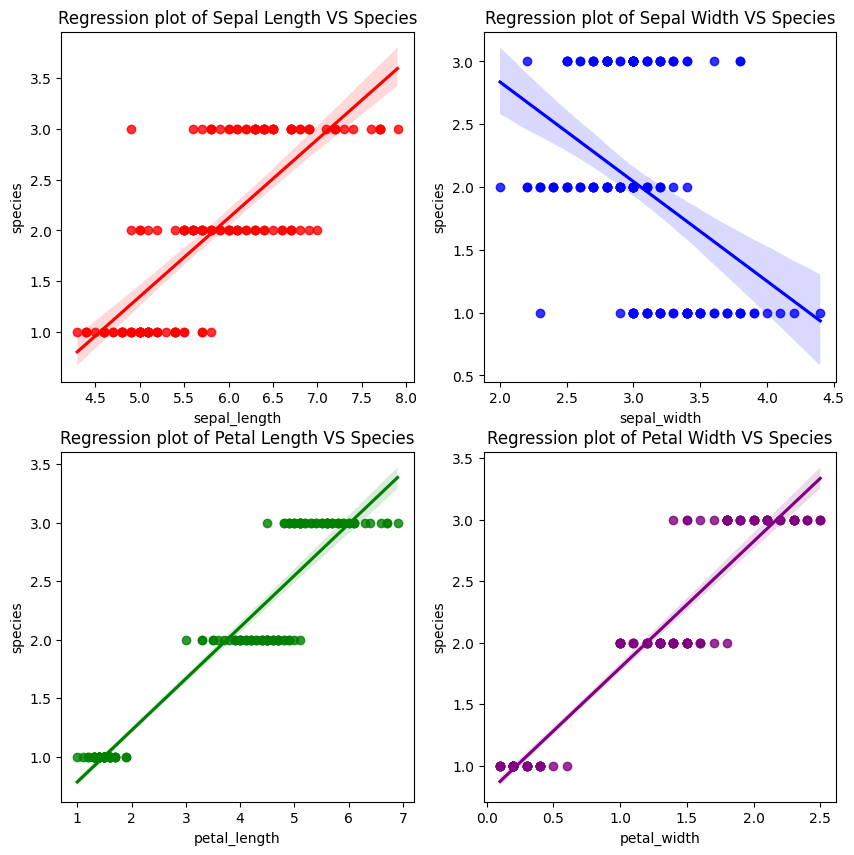

In [17]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
sns.regplot(x='sepal_length',y='species',data=final_df,ax=ax1,color='red')
ax1.set_title('Regression plot of Sepal Length VS Species')
sns.regplot(x='sepal_width',y='species',data=final_df,ax=ax2,color='blue')
ax2.set_title('Regression plot of Sepal Width VS Species')
sns.regplot(x='petal_length',y='species',data=final_df,ax=ax3,color='green')
ax3.set_title('Regression plot of Petal Length VS Species')
sns.regplot(x='petal_width',y='species',data=final_df,ax=ax4,color='purple')
ax4.set_title('Regression plot of Petal Width VS Species')
plt.show()

> #### The above subplots shows the relationship b/w different characteristics of sepal and petal measurements with species

### Predictive Modelling

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X=final_df[['sepal_length','sepal_width','petal_length','petal_width']]
Y=final_df['species']

#### Splitting the dataset into training and testing

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [21]:
print("\n",X_train.shape,"\n",X_test.shape,"\n",Y_train.shape,"\n",Y_test.shape,"\n")


 (120, 4) 
 (30, 4) 
 (120,) 
 (30,) 



In [22]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

### Using Support Vector Machine for Classification

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [24]:
svc_model=SVC()
param_grid={'C':[0.01,0.1,1,10],'kernel':['linear','rbf','poly','sigmoid'],'gamma':[0.01,0.1,1,10]}
Grid=GridSearchCV(svc_model,param_grid=param_grid,cv=10)
Grid.fit(X_train,Y_train)
print("The Best parameters is = ", Grid.best_params_)
print("The Best cross-validation score is = ", Grid.best_score_)

best_svm_model = Grid.best_estimator_

yhat = best_svm_model.predict(X_test)

The Best parameters is =  {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
The Best cross-validation score is =  0.975


In [25]:
yhat.shape

(30,)

### Model Evaluation

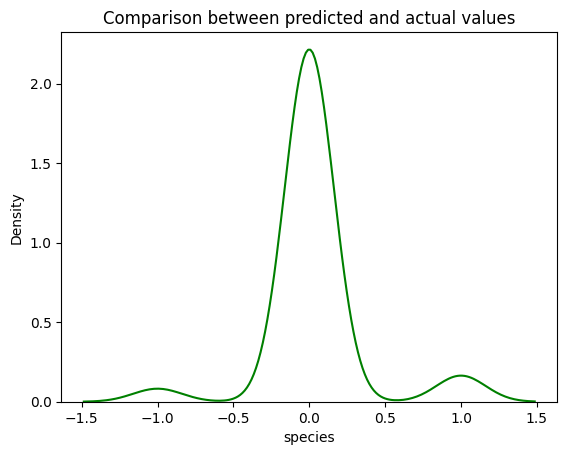

In [26]:
sns.kdeplot(yhat-Y_test,color='green')
plt.title("Comparison between predicted and actual values")
plt.show()

> #### The above plot shows that the predicted values are very close to actual values. This means that the model is performing extremely well.

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, yhat)
print("Accuracy score = ", accuracy)


Accuracy score =  0.9


#### Let's plot the learning curve to check if the model is underfitted or overfitted

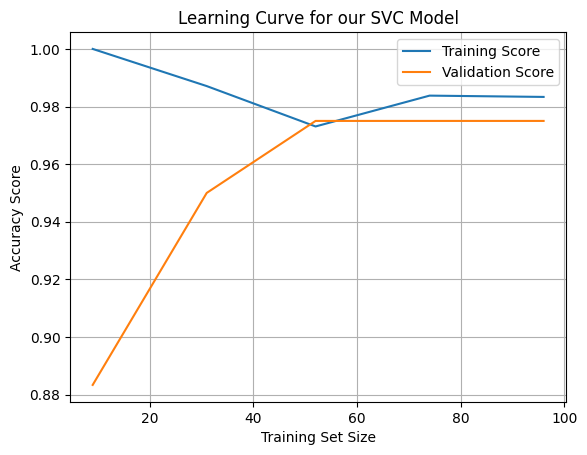

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator=best_svm_model, X=X_train, y=Y_train, cv=5, scoring='accuracy')
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation Score')
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.title('Learning Curve for our SVC Model')
plt.legend()
plt.grid(True)
plt.show()

> The above learning curve shows that there is no Underfitting or Overfitting.

> The model performs extremely well

### Let's make a DataFrame for Predicted and Actual Values

In [29]:
dff=pd.DataFrame({"Actual Values":Y_test,"Predicted Values":yhat})
dff

,Actual Values,Predicted Values
128,3,3
18,1,1
130,3,3
105,3,3
107,3,3
78,2,2
83,2,3
14,1,1
5,1,1
133,3,2


#### Calculating accuracy as proportion of matches

In [30]:
match_count = (dff['Predicted Values'] == dff['Actual Values']).sum()
accuracy = match_count / len(dff) 
print("Accuracy:", accuracy)

Accuracy: 0.9


#### Comparing the Predicted and Actual Values by using a KDE plot

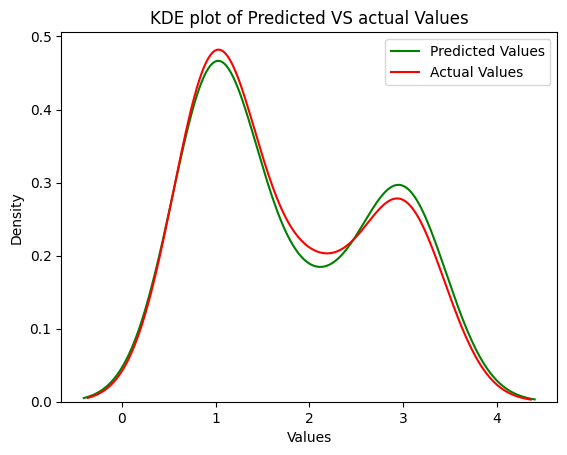

In [31]:
ax=sns.kdeplot(x=dff["Predicted Values"],color='green')
sns.kdeplot(x=dff['Actual Values'],ax=ax,color='red')
plt.legend(["Predicted Values","Actual Values"])
plt.xlabel('Values')
plt.title('KDE plot of Predicted VS actual Values')
plt.show()

> ### The above plots show that the model is performing extremely well.

# Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)